# BASİT DOĞRUSAL REGRESYON

Aşağıdaki tabloda 10 kadın hastanın yaşları (x) ve sistolik kan basınçları (y) verilmiştir:

|     Yaş (x)     	|  52 	|  43 	|  72 	|  35 	|  60 	|  45 	|  56 	|  48 	|  40 	|  65 	|
|:---------------:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|
| Kan Basıncı (y) 	| 146 	| 128 	| 160 	| 122 	| 150 	| 130 	| 152 	| 147 	| 118 	| 152 	|

* X ve Y değişkenleri arasındaki regresyon modelini bulalım!

In [1]:
import numpy as np

yas = np.array([52, 43, 72, 35, 60, 45, 56, 48, 40, 65])
kan_basinci = np.array([146, 128, 160, 122, 150, 130, 152, 147, 118, 152])

In [2]:
yas.shape

(10,)

## X ve Y değişkenleri arasındaki korelasyon katsayısını bulunuz ve yorumlayınız.

X ve Y değişkenleri arasındaki korelasyon katsayısı için  Python'daki`Scipy` paketinde bulunan `pearsonr` fonksiyonunu (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) kullanırız:

In [3]:
import scipy.stats

corr, _ = scipy.stats.pearsonr(x=yas, y=kan_basinci)
print('Pearson korelasyon katsayısı: %.6f' % corr)
#Pearsons korelasyon katsayısı: 0.915664

Pearson korelasyon katsayısı: 0.915664


Verileri temsil edecek model denklemine karar verebilmek için verilerin saçılım grafiğine bakılır. Bunun için `matplotlib` kütüphanesinin `scatter` fonksiyonu kullanılır. Yaş ve kan basıncı verilerinin saçılım grafiği aşağıdaki şekilde verilmiştir.

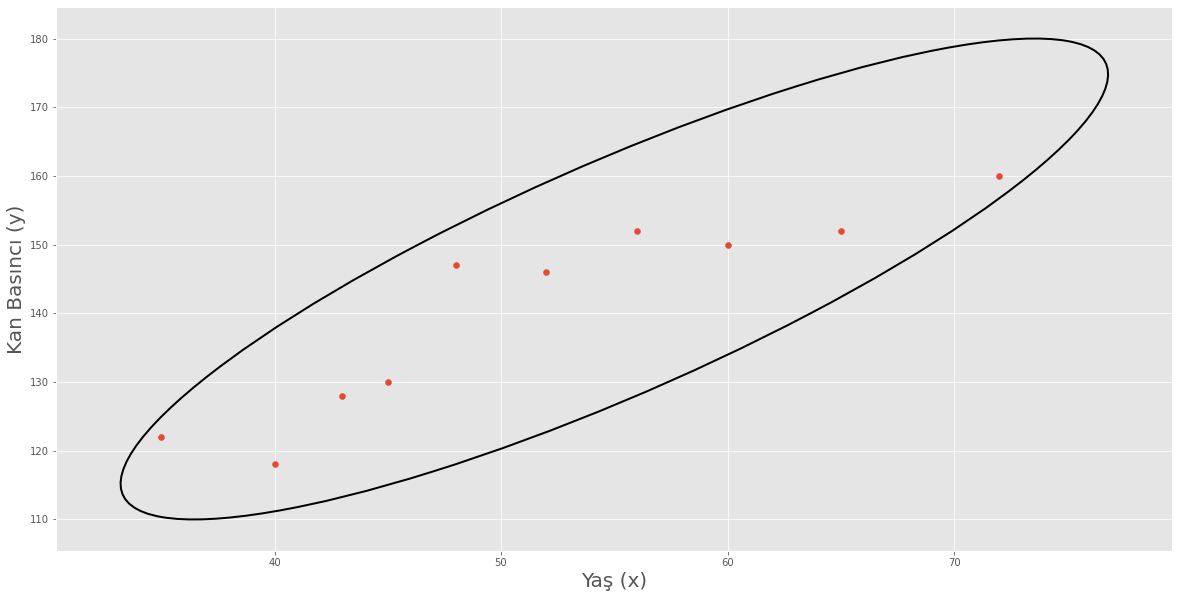

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')


plt.scatter(yas, kan_basinci)
ax = plt.gca()
ax.add_patch(Ellipse((55, 145), width=80, height=20,
                     edgecolor='black',
                     facecolor='none',
                     linewidth=2,
                      angle=60))


plt.xlabel('Yaş (x)', fontsize=20)
plt.ylabel('Kan Basıncı (y)', fontsize=20)
plt.savefig('scatterplot_age_bloodpressure.png', pad_inches=0.0, bbox_inches='tight')
plt.show()

Şimdi, verileri temsil edecek model denklemini bulalım!

## Scikit-Learn ile

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
import numpy as np
import sklearn.linear_model

yas = np.array([52, 43, 72, 35, 60, 45, 56, 49, 40, 65]).reshape(10,1)
kan_basinci = np.array([146, 128, 160, 122, 150, 130, 152, 147, 118, 152])

In [6]:
model = sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(X=yas, y=kan_basinci)

#veya kısaca model = LinearRegression().fit(x, y) kullanabilirsiniz.

LinearRegression()

In [7]:
# Belirtme Katsayısı

model.score(yas, kan_basinci)

0.8505799424443344

Bağımsız değişken olan yaş, bağımlı değişken olan kan basıncındaki değişimin %85'ini açıklamaktadır.

In [8]:
# Sabit katsayı (bias term / intercept) tahmini

model.intercept_

80.64732398983693

In [9]:
# Bağımsız değişkene ait model katsayısı tahmini

model.coef_

array([1.15769199])

Model denklemi:

$Y = \beta_{0} + \beta_{1} X_{1} = 80.64732398983693 + 1.15769199 X_{1}$

In [10]:
model.predict(yas)

array([140.8473076 , 130.42807967, 164.00114745, 121.16654373,
       150.10884354, 132.74346365, 145.47807557, 137.37423162,
       126.95500369, 155.8973035 ])

In [11]:
x_new = [[70], [69], [42]]
y_new = model.predict(x_new)
print(y_new)

[161.68576346 160.52807147 129.27038767]


In [12]:
new_data = np.linspace(start=30, stop=50, num=11)
new_data

array([30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.])

In [13]:
new_data.shape

(11,)

In [14]:
model.predict(new_data.reshape(11,1))

array([115.37808376, 117.69346775, 120.00885173, 122.32423572,
       124.6396197 , 126.95500369, 129.27038767, 131.58577166,
       133.90115564, 136.21653963, 138.53192361])

## statsmodels ile

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

In [15]:
import numpy as np
import statsmodels.api as sm

yas = np.array([52, 43, 72, 35, 60, 45, 56, 49, 40, 65]).reshape((-1, 1))
kan_basinci = np.array([146, 128, 160, 122, 150, 130, 152, 147, 118, 152])

# Sabit katsayı için, tasarım matrisine 1'lerden oluşan bir sütun ekleyin:
yas_bias = sm.add_constant(yas)

Tasarım matrisi:

$$\begin{bmatrix} 1 & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \\ 1 & x_{1}^{(2)} & \cdots & x_{p}^{(2)} \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_{1}^{(p)} & \cdots & x_{p}^{(n)}\\ \end{bmatrix}$$

In [16]:
#Tasarım matrisi (Design Matrix)
yas_bias

array([[ 1., 52.],
       [ 1., 43.],
       [ 1., 72.],
       [ 1., 35.],
       [ 1., 60.],
       [ 1., 45.],
       [ 1., 56.],
       [ 1., 49.],
       [ 1., 40.],
       [ 1., 65.]])

In [17]:
model = sm.OLS(kan_basinci, yas_bias)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     45.54
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           0.000145
Time:                        11:05:39   Log-Likelihood:                -30.978
No. Observations:                  10   AIC:                             65.96
Df Residuals:                       8   BIC:                             66.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6473      9.069      8.892      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
print('belirtme katsayısı:', results.rsquared)

belirtme katsayısı: 0.8505799424443348


Bağımsız değişken olan yaş, bağımlı değişken olan kan basıncındaki değişimin %85'ini açıklamaktadır.

In [19]:
print('regresyon katsayıları:', results.params)

regresyon katsayıları: [80.64732399  1.15769199]


İki yöntem ile tahminler elde edebilirsiniz:

In [20]:
print('tahminler', results.fittedvalues, sep='\n')

tahminler
[140.8473076  130.42807967 164.00114745 121.16654373 150.10884354
 132.74346365 145.47807557 137.37423162 126.95500369 155.8973035 ]


In [21]:
print('tahminler:', results.predict(yas_bias), sep='\n')

tahminler:
[140.8473076  130.42807967 164.00114745 121.16654373 150.10884354
 132.74346365 145.47807557 137.37423162 126.95500369 155.8973035 ]


# TEK YÖNLÜ VARYANS ANALİZİ

Bir üniversitenin mühendislik fakültesinin A, B, ve C mühendislik bölümü öğrencilerinin İstatistik dersinin genel sınavından aldığı notlar aşağıdaki gibi kaydedilmiştir. 

|  A |  B |  C |
|:--:|:--:|:--:|
| 65 | 52 | 60 |
| 75 | 72 | 73 |
| 70 | 65 | 66 |
| 70 | 61 | 62 |
| 80 | 53 | 60 |
| 86 | 65 | 71 |
| 70 | 63 | 64 |
| 71 | 62 | 63 |
| 73 | 62 | 65 |
| 88 | 59 | 58 |

Bu verilere göre A, B ve C Mühendislik Bölümleri için İstatistik ders notlarının varyanslarının eşit olup olmadığını Levene testi ve Bartlett testi ile $\% 95$ güven düzeyinde araştırınız.

## Levene Testi ile Varyans Homojenliğinin Karşılaştırılması

İlk olarak verileri sözlük (dictionary) olarak yazalım ve `pandas` paketini kullanarak bir `DataFrame` oluşturalım:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
# assign data of lists.  
data = {'A': [65, 75, 70, 70, 80, 86, 70, 71, 73, 88], 
        'B': [52, 72, 65, 61, 53, 65, 63, 62, 62, 59], 
        'C': [60, 73, 66, 62, 60, 71, 64, 63, 65, 58]}

# Create DataFrame  
df = pd.DataFrame(data)  

df

,A,B,C
0,65,52,60
1,75,72,73
2,70,65,66
3,70,61,62
4,80,53,60
5,86,65,71
6,70,63,64
7,71,62,63
8,73,62,65
9,88,59,58


Önceden bahsettiğimiz gibi burada 3 tane deneme (treatment) vardır: A, B ve C. Bu denemeler ANOVA analizi için grupları (group) oluşturmaktadır. 

Varyans homojenliği için kurmamız gereken hipotezler aşağıdaki gibidir:

\begin{equation*}
\nonumber
    \begin{split}
        H_{0}&: \sigma^{2}_{A} = \sigma^{2}_{B} = \sigma^{2}_{C} \textrm{ (Örneklemlerim çekildiği kitlelerin varyansları eşittir.)} \\
        H_{1}&: \textrm{En az bir $\sigma^{2}_{i}$ diğerlerinden farklıdır} \textrm{ (Örneklemlerin çekildiği kitlelerin varyansları eşit değildir.)}
    \end{split}
\end{equation*}

In [23]:
from scipy.stats import levene

stat, p = levene(df['A'], df['B'], df['C'], center = 'mean')
print(stat)
print(p)

1.105925537493444
0.3454325547263218


p-değeri $0.3454$ çıkmıştır. Elimizdeki anlamlılık değeri olan $\alpha$'yı $0.05$ olarak seçmiştik. $p > \alpha$ olduğu için $H_{0}$ hipotezi reddedilemez. Başka bir deyişle, örneklemlerin çekildiği kitlelerin varyanslarının eşit olduğu $\% 95$ güven ile söylenir. Tek yönlü ANOVA'nın uygulanabilmesi için gerekli olan varyans homojenliği varsayımı sağlanmış olur.

## Bartlett Testi 

In [24]:
from scipy.stats import bartlett

stat, p = bartlett(df['A'], df['B'], df['C'])
print(stat)
print(p)

1.7433885206490682
0.4182423372243934


p-değeri $0.4182$ çıkmıştır. Elimizdeki anlamlılık değeri olan $\alpha$'yı $0.05$ olarak seçmiştik. $p > \alpha$ olduğu için $H_{0}$ hipotezi reddedilemez. Başka bir deyişle, örneklemlerin çekildiği kitlelerin varyanslarının eşit olduğu $\% 95$ güven ile söylenir. Tek yönlü ANOVA'nın uygulanabilmesi için gerekli olan varyans homojenliği varsayımı sağlanmış olur.

## Tek Yönlü Varyans Analizi 

Bu problem için varyans homojenliğini sağladıktan sonra ANOVA testine geçebiliriz. Burada 3 seviyeden oluşan denemeler için ortalamaları arasında fark olup olmadığı test edilir. Tek bir bağımsız değişken (faktör) olduğu için tek yönlü varyans çözümlemesi testi uygun istatistiksel testtir.

Tek yönlü varyans analizi için  kurulması gereken Sıfır hipotezi ve karşıt hipotez şu şekildedir:


$H_{0}: \mu_{A}=\mu_{B}=\mu_{C}=\mu$ (A, B ve C Mühendisligi Bölümleri öğrencilerinin
İstatistik dersinin genel sınav notları arasında fark yoktur)

$H_{1}$: En az bir $\mu_{\mathrm{j}}$ diğerlerinden farklıdır. (A, B ve C Mühendislik Bölümleri
ögrencilerinin istatistik dersinin genel sınav notları arasinda fark vardır).


Güven düzeyi $1 - \alpha = \%95$'dir. Öyleyse testin önem düzeyi $\alpha=0.05$'dir. Test sonucu elde edilen p-değeri bu $\alpha$ değeri ile karşılaştırılarak sonuç yorumlanır.

In [25]:
from scipy.stats import f_oneway

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = f_oneway(df['A'], df['B'], df['C'])

print(fvalue, pvalue)

13.178194607268463 0.00010148316082756144


p değeri 0.00010148316082756144 olarak bulunmuştur. $p < \alpha = 0.05$ olduğundan $H_{0}$ hipotezi reddedilir.Başka bir deyişle, A, B ve C Mühendislik Bölümleri arasında İstatistik dersinin genel sınav notları bakımından farklılık olduğu $\% 95$ güven ile söylenir. 

## Çoklu Karşılaştırmalar

A, B ve C Mühendislik Bölümleri arasında İstatistik dersinin genel sınav notları bakımından farklılık olduğunu bulduğumuza göre şimdi Tukey testini kullanarak hangi bölümün farklılık yarattığını elde edelim.

### Tukey Testi

In [26]:
#pd.melt: Unpivot a DataFrame from wide to long format,
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])

df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,65
1,1,A,75
2,2,A,70
3,3,A,70
4,4,A,80
5,5,A,86
6,6,A,70
7,7,A,71
8,8,A,73
9,9,A,88


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_melt['value'],
                          groups=df_melt['treatments'],
                          alpha=0.05)
#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    -13.4  0.001 -20.226 -6.574   True
     A      C    -10.6 0.0018 -17.426 -3.774   True
     B      C      2.8 0.5698  -4.026  9.626  False
---------------------------------------------------


Tukey testinin verdiği p-değerleri incelendiğinde (ya da reject sütununa bakıldığında) A Bölümü ile B ve C Bölümleri arasında istatistik dersi genel sınav not ortalamaları bakımından farklılık varken, B ve C bölümleri arasında istatistik dersi genel sınav not ortalamaları bakımından fark yoktur. 

# Kruskal Wallis-H Testi

Normal dağılım göstermeyen gruplarda üç veya daha fazla sayıda grubun ortalamaları arasındaki farklılığın anlamlılığını test amacıyla kullanılan bir tekniktir. Tek yönlü ANOVA'nın parametrik olmayan karşılığıdır.  

Aynı cins yumurta tavuğuna 3 fark yem verilerek yumurta ağırlık artışının incelendiği bir araştırmada 3 gruptan rastgele seçilen 20 yumurtanın ağırlıkları aşağıdaki gibi bulunmuştur. Gruplar arasında fark olup olmadığını Kruskal-Wallis testi kullanarak $\alpha = 0.05$ anlamlılık düzeyinde test ediniz.

| Yem   Türü |      |      |
|:----------:|:----:|:----:|
|      A     |   B  |   C  |
|    40.2    | 38.3 | 39.9 |
|    39.4    | 36.7 | 41.3 |
|    48.3    | 39.8 | 40.6 |
|    36.6    | 30.7 | 46.4 |
|    35.8    | 35.7 | 46.9 |
|    40.1    | 38.2 | 48.4 |
|    39.5    |      | 45.3 |

In [28]:
import numpy as np
from scipy import stats
import scikit_posthocs as sp

A = [40.2, 39.4, 48.3, 36.6, 35.8, 40.1, 39.5]
B = [38.3, 36.7, 39.8, 30.7, 35.7, 38.2]
C=[39.9, 41.3, 40.6, 46.4, 46.9, 48.4, 45.3]

In [29]:
stats.kruskal(A,B,C)

KruskalResult(statistic=10.739455782312916, pvalue=0.004655397912890877)

p-değeri (pvalue) 0.004655397912890877 olarak bulunmuştur. $p< \alpha = 0.05$  olduğundan  $H_{0}$  hipotezi reddedilir. Yani yumurta ağırlıkları bakımından yem türleri arasında fark vardır. En az bir grup farklıdır ve farklı olan grubu bulmak için çoklu karşılaştırma Dunn Testi ile yapılır

## Dunn Testi

In [30]:
data_ = [A,B,C]
sp.posthoc_dunn(data_)

,1,2,3
1,1.000000,0.167074,0.052072
2,0.167074,1.000000,0.001162
3,0.052072,0.001162,1.000000


Bu değerler p-değerleridir. Verinin giriliş sırasına göre 1 değeri A yemini, 2 değeri B yemini ve 3 değeri C yemini göstermektedir. Kurulması gereken 3 farklı hipotez vardır:

<br>

$H_{0}: \text{A ve B yem türleri arasında fark yoktur.}$
$H_{1}: \text{A ve B yem türleri arasında fark vardır.}$

A ve B yem türleri karşılaştırması için p-değeri 0.167074 olarak bulunmuştur.  $p = 0.167074  > \alpha = 0.05$  olduğundan  $H_{0}$  hipotezi kabul edilir (reddedilemez). Yani, A ve B yem türleri arasında fark yoktur.

<br>
<br>

$H_{0}: \text{A ve C yem türleri arasında fark yoktur.}$
$H_{1}: \text{A ve C yem türleri arasında fark vardır.}$

A ve C yem türleri karşılaştırması için p-değeri 0.052072 olarak bulunmuştur.  $p = 0.052072 > \alpha = 0.05$  olduğundan  $H_{0}$  hipotezi kabul edilir (reddedilemez). Yani, A ve C yem türleri arasında fark yoktur.

<br>
<br>

$H_{0}: \text{B ve C yem türleri arasında fark yoktur.}$
$H_{1}: \text{B ve C yem türleri arasında fark vardır.}$

B ve C yem türleri karşılaştırması için p-değeri 0.001162 olarak bulunmuştur.  $p = 0.001162 < \alpha = 0.05$  olduğundan  $H_{0}$  hipotezi red edilir. Yani, B ve C yem türleri arasında fark yoktur.

<br>
<br>

Özetle, B ve C yem türleri arasında yumurta ağırlıkları bakımından fark olduğu görülmektedir. 
